In [2]:
#https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
#plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,12)
pd.set_option('display.max_rows', None)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
daily = pd.read_csv('worldometer_coronavirus_daily_data.csv')
summary = pd.read_csv('worldometer_covid_5Aug21.csv')
vac_by_cty = pd.read_csv('country_vaccinations_v2.csv')

In [3]:
summary.drop('Unnamed: 12', axis=1, inplace=True)

In [11]:
daily.shape

(106284, 7)

In [5]:
# review dataframe

vac_by_cty.shape

(34261, 15)

In [6]:
# fill nan with zero

vac_by_cty.fillna(0, inplace=True)

In [7]:
# create an additional column 'pct_death'

summary['pct_death'] = summary['total_deaths']/summary['population']
summary['pct_rec'] = summary['total_recovered']/summary['population']
summary['pct_confirmed'] = summary['total_confirmed']/summary['population']
summary['pct_tests'] = summary['total_tests']/summary['population']
summary.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,pct_death,pct_rec,pct_confirmed,pct_tests
0,Afghanistan,Asia,149361,6864.0,101329.0,41168.0,1124.0,3745.0,172.0,718276.0,18010.0,39881090,0.000172,0.002541,0.003745,0.018010
1,Albania,Europe,133310,2457.0,130314.0,539.0,3.0,46379.0,855.0,916777.0,318949.0,2874366,0.000855,0.045337,0.046379,0.318949
2,Algeria,Africa,176724,4404.0,118409.0,53911.0,37.0,3952.0,98.0,230861.0,5163.0,44712451,0.000098,0.002648,0.003952,0.005163
3,Andorra,Europe,14797,128.0,14380.0,289.0,NaN,191176.0,1654.0,193595.0,2501227.0,77400,0.001654,0.185788,0.191176,2.501227
4,Angola,Africa,43158,1026.0,39582.0,2550.0,8.0,1270.0,30.0,821071.0,24167.0,33975047,0.000030,0.001165,0.001270,0.024167


In [8]:
# create an additional column 'pct_vac'

vac_by_cty['pct_vac'] = vac_by_cty['people_fully_vaccinated_per_hundred']/100

vac_by_cty.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,pct_vac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0


In [9]:
# captitalise every first letter in vac_by_cty_list_cty_names

vac_by_cty['country'] = [cap.title() for cap in vac_by_cty['country']]

In [10]:
# rename USA and UK to align with summary

vac_by_cty.replace({'United States':'USA','United Kingdom':'UK'}, inplace=True)
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

## Combining a few tables together

In [12]:
# find unique country of these 2 sets of data

unique_cty = list(set(vac_by_cty_list_cty_names)-(set(summary_list_cty_names)))
unique_cty

['Antigua And Barbuda',
 'Bosnia And Herzegovina',
 'Kosovo',
 'Tonga',
 'Saint Kitts And Nevis',
 'Turkmenistan',
 'Sao Tome And Principe',
 'Curacao',
 'Tuvalu',
 'Brunei',
 'Turks And Caicos Islands',
 'North Macedonia',
 'Democratic Republic Of Congo',
 'Eswatini',
 'Trinidad And Tobago',
 'Cape Verde',
 'Wallis And Futuna',
 'Nauru',
 'Isle Of Man',
 'Vietnam',
 'Palestine',
 "Cote D'Ivoire",
 'Timor',
 'Niue',
 'Scotland',
 'England',
 'Falkland Islands',
 'Czechia',
 'Cook Islands',
 'Jersey',
 'Northern Ireland',
 'Macao',
 'Northern Cyprus',
 'Sint Maarten (Dutch Part)',
 'Pitcairn',
 'Hong Kong',
 'Bonaire Sint Eustatius And Saba',
 'Wales',
 'Guernsey']

In [13]:
#remove countries in the unique_cty list for vac_by_cty
add=[]
for i in unique_cty:
    x = vac_by_cty[vac_by_cty.country==i]
    add.append(x)
add = pd.concat(add)

add_idx=[]
for y in add.index:
    add_idx.append(y)
    

In [14]:
# remove these countries for vac_by_cty

vac_by_cty.drop(index= add_idx, inplace=True)

In [15]:
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [16]:
# find unique country of these 2 sets of data vice versa

unique_cty_a = list(set(summary_list_cty_names)-(set(vac_by_cty_list_cty_names)))
unique_cty_a

['Holy See',
 'Channel Islands',
 'Sint Maarten',
 'Wallis and Futuna',
 'Timor Leste',
 'Burundi',
 'Antigua and Barbuda',
 'Cura?ao',
 'Macedonia',
 'Brunei Darussalam',
 'Turks and Caicos Islands',
 'Martinique',
 'Saint Kitts and Nevis',
 'China Macao Sar',
 'Saint Martin',
 'Trinidad and Tobago',
 'Falkland Islands Malvinas',
 'Tanzania',
 'Reunion',
 'Czech Republic',
 'Caribbean Netherlands',
 'State Of Palestine',
 'Swaziland',
 'Western Sahara',
 'Sao Tome and Principe',
 'Guadeloupe',
 'Saint Pierre Miquelon',
 'Viet Nam',
 'Marshall Islands',
 'Isle of Man',
 'Mayotte',
 'Eritrea',
 'Cote D Ivoire',
 'Saint Barthelemy',
 'Micronesia',
 'Bosnia and Herzegovina',
 'Cabo Verde',
 'China Hong Kong Sar',
 'Democratic Republic Of The Congo',
 'French Guiana']

In [17]:
#remove countries in the unique_cty list for summary

add=[]
for i in unique_cty_a:
    x = summary[summary.country==i]
    add.append(x)
add = pd.concat(add)

add_idx=[]
for y in add.index:
    add_idx.append(y)

In [18]:
# remove these countries for vac_by_cty

summary.drop(index= add_idx, inplace=True)

In [19]:
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [20]:
# check for uniqueness

summary.country.describe()

count      180
unique     180
top       Peru
freq         1
Name: country, dtype: object

In [21]:
# check for uniqueness

vac_by_cty.country.describe()

count      29100
unique       180
top       Norway
freq         239
Name: country, dtype: object

In [22]:
# replace nan with zero

vac_by_cty.replace({np.nan:0}, inplace=True)

In [23]:
# replace nan with zero

summary.replace({np.nan:0}, inplace=True)

In [24]:
# rename summary.country to summary.country_1

summary.rename(columns={'country':'country_1'}, inplace=True)

In [25]:
vac_by_cty.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,pct_vac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.0


In [26]:
# compute total vaccinations by country

pct_vac = vac_by_cty.groupby('country')['pct_vac'].agg(np.sum).reset_index()

In [27]:
# review

pct_vac.head()

,country,pct_vac
0,Afghanistan,0.0609
1,Albania,7.1263
2,Algeria,0.0165
3,Andorra,2.3226
4,Angola,0.1632


In [28]:
#reset index for summary

summary.reset_index(drop=True, inplace=True)

In [29]:
# compute a new dataframe consisting only of country and pct_death and continent

pct_death = summary.loc[:, ['country_1','continent','pct_tests','pct_confirmed','pct_rec','pct_death','total_deaths','population']]

In [30]:
pct_death.shape, pct_vac.shape

((180, 8), (180, 2))

## Ready for EDA

In [31]:
# concatenate the 2 dataframes 

pct_death_vac = pd.concat([pct_vac,pct_death], axis=1)

In [32]:
# drop country_1

del pct_death_vac['country_1']

In [33]:
# review of dataframe after contenation

pct_death_vac.head()

,country,pct_vac,continent,pct_tests,pct_confirmed,pct_rec,pct_death,total_deaths,population
0,Afghanistan,0.0609,Asia,0.018010,0.003745,0.002541,0.000172,6864.0,39881090
1,Albania,7.1263,Europe,0.318949,0.046379,0.045337,0.000855,2457.0,2874366
2,Algeria,0.0165,Africa,0.005163,0.003952,0.002648,0.000098,4404.0,44712451
3,Andorra,2.3226,Europe,2.501227,0.191176,0.185788,0.001654,128.0,77400
4,Angola,0.1632,Africa,0.024167,0.001270,0.001165,0.000030,1026.0,33975047


In [34]:
# reorder columns

pct_death_vac=pct_death_vac[['country','continent','pct_tests','pct_vac','pct_confirmed','pct_rec',\
                             'pct_death','total_deaths','population']]

In [35]:
pct_death_vac.loc[168,'country']='Europe'
pct_death_vac.loc[169,'country']='North America'

### EDA

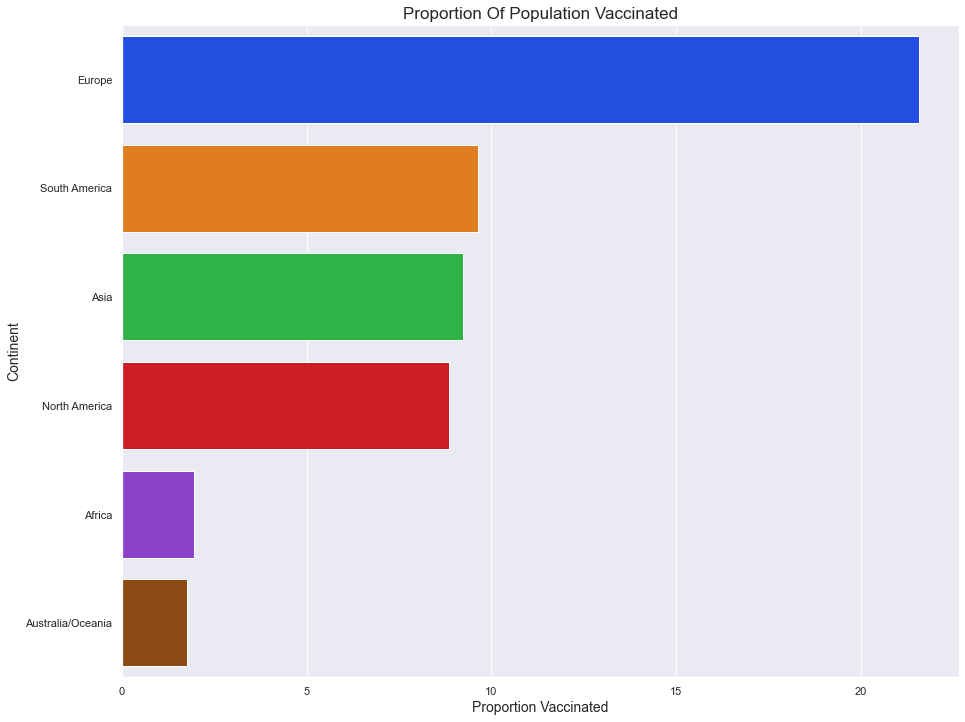

In [36]:
# plot chart to show vaccination rates

sns.set_style("darkgrid")
order = pct_death_vac.groupby('continent')['pct_vac'].mean().sort_values(ascending=False).index
sns.barplot(data=pct_death_vac, x='pct_vac', y='continent', ci=None, order=order, palette='bright');
plt.title('Proportion Of Population Vaccinated', fontsize=17);
plt.xlabel('Proportion Vaccinated', fontsize=14);
plt.ylabel('Continent', fontsize=14);

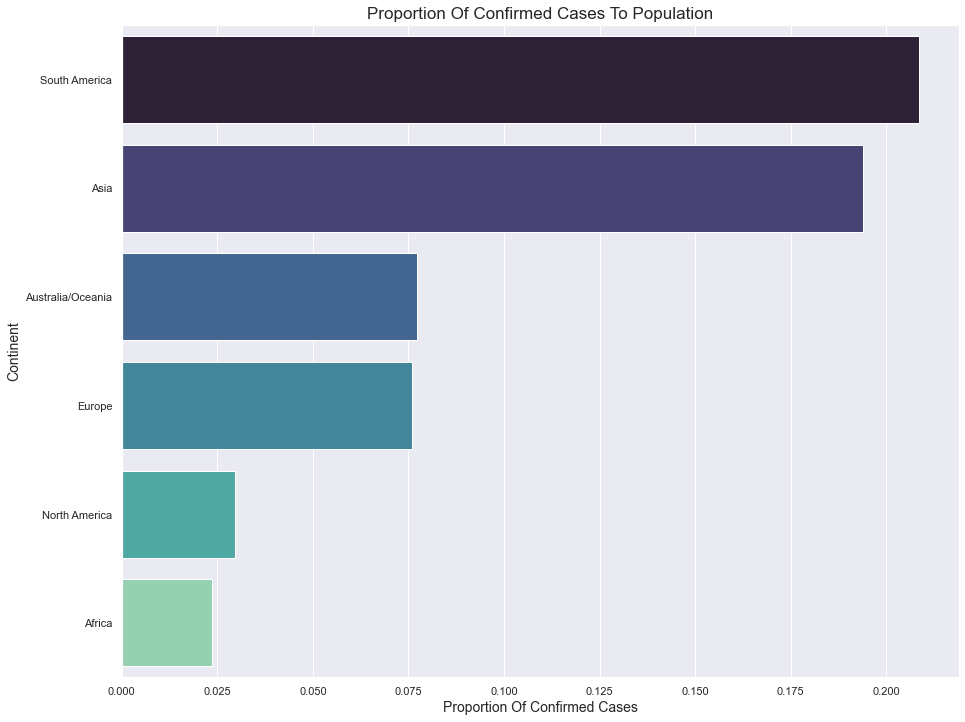

In [37]:
# plot chart to show daily new cases rates

order = pct_death_vac.groupby('continent')['pct_confirmed'].mean().sort_values(ascending=False).index
sns.barplot(data=pct_death_vac, x='pct_confirmed', y='continent', ci=None, order=order, palette='mako');
plt.title('Proportion Of Confirmed Cases To Population', fontsize=17);
plt.xlabel('Proportion Of Confirmed Cases', fontsize=14);
plt.ylabel('Continent', fontsize=14);

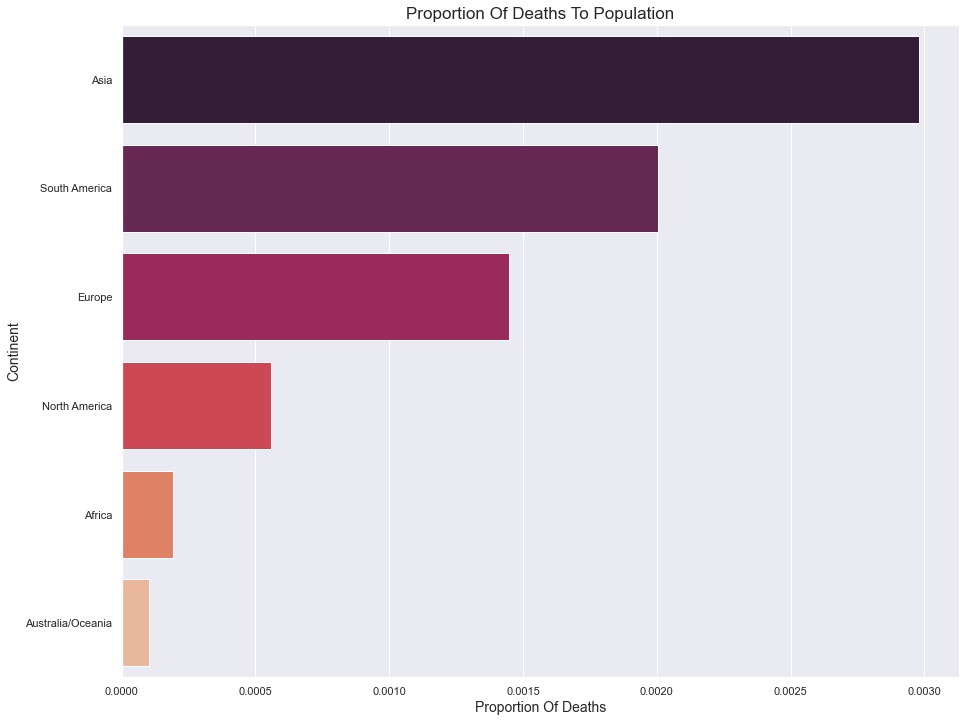

In [38]:
# plot chart to show daily new cases rates

order = pct_death_vac.groupby('continent')['pct_death'].mean().sort_values(ascending=False).index
sns.barplot(data=pct_death_vac, x='pct_death', y='continent', ci=None, order=order, palette='rocket');
plt.title('Proportion Of Deaths To Population', fontsize=17);
plt.xlabel('Proportion Of Deaths', fontsize=14);
plt.ylabel('Continent', fontsize=14);

In [39]:
# review

pct_death_vac.head(5)

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths,population
0,Afghanistan,Asia,0.018010,0.0609,0.003745,0.002541,0.000172,6864.0,39881090
1,Albania,Europe,0.318949,7.1263,0.046379,0.045337,0.000855,2457.0,2874366
2,Algeria,Africa,0.005163,0.0165,0.003952,0.002648,0.000098,4404.0,44712451
3,Andorra,Europe,2.501227,2.3226,0.191176,0.185788,0.001654,128.0,77400
4,Angola,Africa,0.024167,0.1632,0.001270,0.001165,0.000030,1026.0,33975047


In [40]:
# review

pct_death_vac.shape

(180, 9)

## Main criteria is population must greater than 5mil

In [43]:
# filter the rows where population > 5mil

pct_death_vac = pct_death_vac[pct_death_vac.population > 5000000]

In [44]:
# create a new dataframe fpr confirmed cases and deaths

pct_death_confirmed = pct_death_vac[['country','continent','pct_confirmed','pct_death']]
pct_death_confirmed.head()

,country,continent,pct_confirmed,pct_death
0,Afghanistan,Asia,0.003745,0.000172
2,Algeria,Africa,0.003952,0.000098
4,Angola,Africa,0.001270,0.000030
6,Argentina,South America,0.109000,0.002338
9,Australia,Australia/Oceania,0.001371,0.000036


## Trim down to 90 countries

In [45]:
# trim down the number of countries with the worst confirmed cases and death to 90 countries

while pct_death_confirmed.shape[0] > 90:
    
    pct_confirmed_max = pct_death_confirmed['pct_confirmed'].max()
    pct_confirmed_index = pct_death_confirmed[pct_death_confirmed['pct_confirmed']==pct_confirmed_max].index 
    pct_death_confirmed.drop(pct_confirmed_index, inplace=True)
    
    pct_death_max = pct_death_confirmed['pct_death'].max()
    pct_death_index = pct_death_confirmed[pct_death_confirmed['pct_death']==pct_death_max].index 
    pct_death_confirmed.drop(pct_death_index, inplace=True)

In [46]:
# review

pct_death_confirmed.shape

(90, 4)

In [47]:
# import KMeans for unsupervised learning

from sklearn.cluster import KMeans

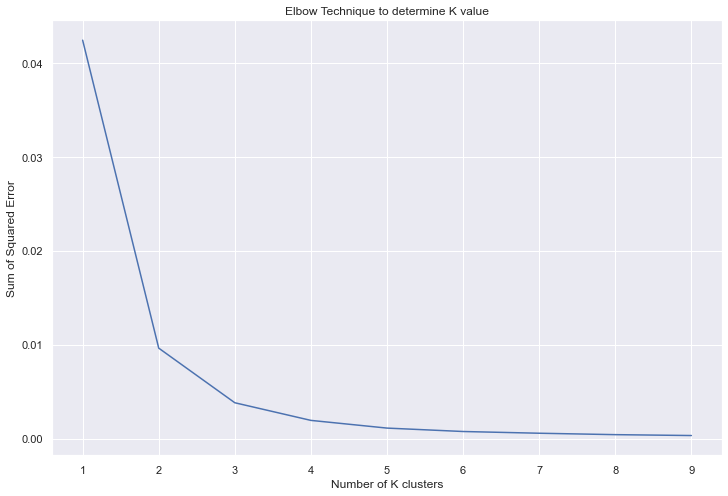

In [48]:
# use elbow technique to compute optimum number of clusters or k

k = range(1,10)
sse = []
for i in k:  
    km = KMeans(n_clusters=i).fit(pct_death_confirmed[['pct_confirmed','pct_death']])
    sse.append(km.inertia_)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

In [49]:
# split into 3 clusters

km = KMeans(3).fit(pct_death_confirmed[['pct_confirmed','pct_death']])
km_clusters = km.predict(pct_death_confirmed[['pct_confirmed','pct_death']])
pct_death_confirmed['clusters'] = km_clusters

## 1st shortlist

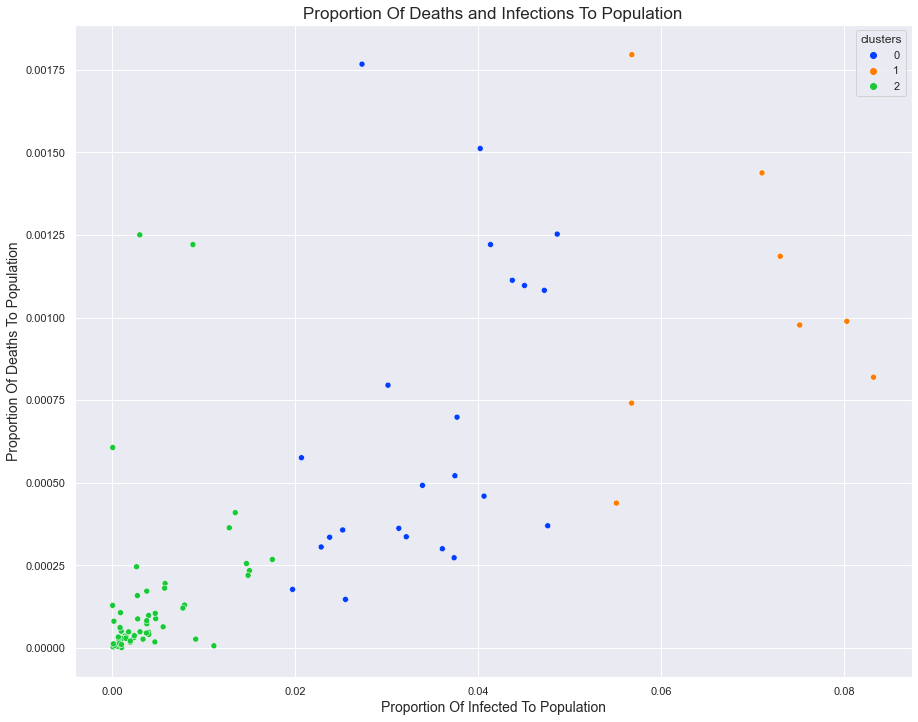

In [50]:
# visualize

sns.scatterplot(data=pct_death_confirmed, x='pct_confirmed', y='pct_death', hue='clusters', palette='bright');
plt.title('Proportion Of Deaths and Infections To Population', fontsize=17);
plt.xlabel('Proportion Of Infected To Population', fontsize=14);
plt.ylabel('Proportion Of Deaths To Population', fontsize=14);

In [51]:
# retrieve the indexes of each cluster

cluster_2_index = pct_death_confirmed.loc[pct_death_confirmed['clusters']==2,'country'].index.tolist()

In [52]:
cluster_1_index = pct_death_confirmed.loc[pct_death_confirmed['clusters']==1,'country'].index.tolist()

In [53]:
cluster_0_index = pct_death_confirmed.loc[pct_death_confirmed['clusters']==0,'country'].index.tolist()

In [54]:
# add the indexes of cluster 0 and 2 the which are the minimum 2 clusters

shortlist_1_index = cluster_0_index + cluster_2_index

In [55]:
# retrieve all information regarding the 2 clusters in the original dataframe

shortlist_1_df = pct_death_vac[pct_death_vac.index.isin(shortlist_1_index)]


In [56]:
# review

shortlist_1_df.head()

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths,population
0,Afghanistan,Asia,0.018010,0.0609,0.003745,0.002541,0.000172,6864.0,39881090
2,Algeria,Africa,0.005163,0.0165,0.003952,0.002648,0.000098,4404.0,44712451
4,Angola,Africa,0.024167,0.1632,0.001270,0.001165,0.000030,1026.0,33975047
9,Australia,Australia/Oceania,1.004560,3.7864,0.001371,0.001180,0.000036,932.0,25822206
11,Azerbaijan,Asia,0.397576,11.0149,0.033879,0.032591,0.000492,5039.0,10238791


In [57]:
# create new dataframe for vaccination and test

shortlist_1_pct_tests = shortlist_1_df[['pct_vac','pct_tests']]
shortlist_1_pct_tests.shape

(82, 2)

In [58]:
shortlist_1_pct_tests.head()

,pct_vac,pct_tests
0,0.0609,0.018010
2,0.0165,0.005163
4,0.1632,0.024167
9,3.7864,1.004560
11,11.0149,0.397576


In [59]:
#sns.scatterplot(data=shortlist_1, x='pct_vac', y='pct_rec');

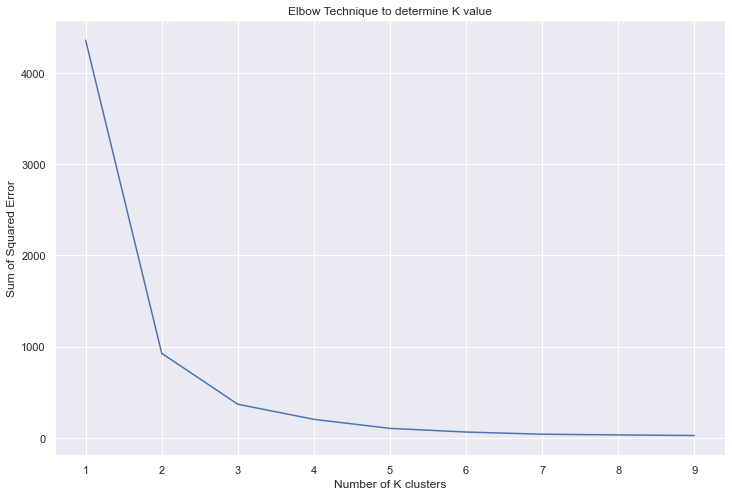

In [60]:
k = range(1,10)
sse = []
for i in k: 
    kms = KMeans(n_clusters=i).fit(shortlist_1_pct_tests)
    sse.append(kms.inertia_)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

In [61]:
# split into 3 clusters

kms = KMeans(3).fit(shortlist_1_pct_tests)
shortlist_1_pct_tests_cluster = kms.predict(shortlist_1_pct_tests)


In [62]:
# pass the cluster labels to dataframe

shortlist_1_df['clusters'] = shortlist_1_pct_tests_cluster

In [63]:
shortlist_2 = shortlist_1_df.copy()

In [64]:
shortlist_2.shape

(82, 10)

## 2nd shortlist

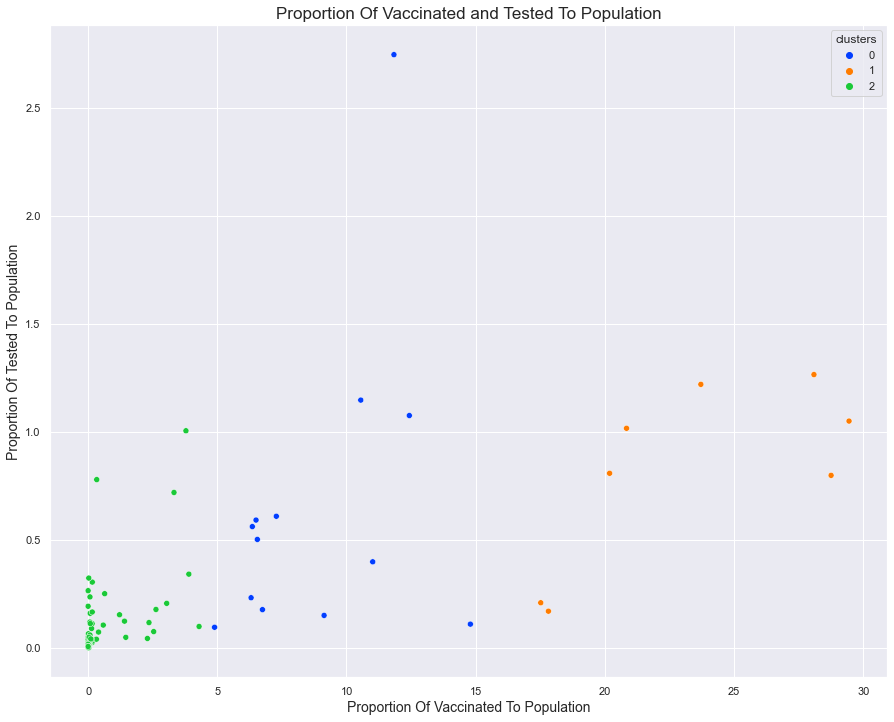

In [65]:
sns.scatterplot(data=shortlist_2, x='pct_vac', y='pct_tests', hue='clusters', palette='bright');
plt.title('Proportion Of Vaccinated and Tested To Population', fontsize=17);
plt.xlabel('Proportion Of Vaccinated To Population', fontsize=14);
plt.ylabel('Proportion Of Tested To Population', fontsize=14);

In [66]:
shortlist_2_1_index = shortlist_2[shortlist_2['clusters']==1].index.tolist()
shortlist_2_0_index = shortlist_2[shortlist_2['clusters']==0].index.tolist()

In [67]:
shortlist_2_index = shortlist_2_1_index + shortlist_2_0_index

In [68]:
shortlist_2_1 = shortlist_2[shortlist_2['clusters']==1]

In [69]:
shortlist_2_0 = shortlist_2[shortlist_2['clusters']==0]

In [70]:
pct_death_vac[pct_death_vac.index.isin(shortlist_2_index)].country.unique()

array(['Azerbaijan', 'Cambodia', 'Canada', 'Cuba', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Finland', 'Germany', 'Greece', 'Japan',
       'Kazakhstan', 'Malaysia', 'Morocco', 'New Zealand', 'Norway',
       'Russia', 'Singapore', 'South Korea', 'Switzerland', 'Turkey'],
      dtype=object)

In [71]:
final_shortlist = pd.concat([shortlist_2_1, shortlist_2_0], axis=0)


In [72]:
final_shortlist.shape

(21, 10)

In [73]:
gdp = pd.read_csv('gdp_per_capita.csv')

In [74]:
gdp.head()

,Unnamed: 0,GDP per capita
0,Afghanistan,1976
1,Albania,12943
2,Algeria,15293
3,American Samoa,11534
4,Andorra,40897


In [75]:
gdp.rename(columns={'Unnamed: 0':'country'}, inplace=True)

In [76]:
gdp.sort_values('country', ascending=True, inplace=True)

In [77]:
gdp.head()

,country,GDP per capita
0,Afghanistan,1976
1,Albania,12943
2,Algeria,15293
3,American Samoa,11534
4,Andorra,40897


In [78]:
gdp.columns = gdp.columns.map(lambda x: x.replace(' ','_').lower())

In [79]:
acc= []
for i in final_shortlist.country:
    acc.append(gdp[gdp['country']==i])
    
gdp_shortlist = pd.concat(acc)

In [80]:
gdp_shortlist.country

35                 Canada
52     Dominican Republic
68                Germany
70                 Greece
121               Morocco
133                Norway
171           Switzerland
180                Turkey
13             Azerbaijan
33               Cambodia
47                   Cuba
54                Ecuador
56            El Salvador
63                Finland
91                  Japan
93             Kazakhstan
109              Malaysia
127           New Zealand
146                Russia
158             Singapore
163           South Korea
Name: country, dtype: object

In [81]:
final_shortlist.country

30                 Canada
46     Dominican Republic
61                Germany
64                 Greece
112               Morocco
123                Norway
160           Switzerland
167                Turkey
11             Azerbaijan
28               Cambodia
41                   Cuba
47                Ecuador
49            El Salvador
55                Finland
83                  Japan
85             Kazakhstan
100              Malaysia
119           New Zealand
135                Russia
147             Singapore
153           South Korea
Name: country, dtype: object

In [82]:
final_shortlist['gdp_per_capita'] = gdp_shortlist['gdp_per_capita'].tolist()

In [83]:
final_shortlist.shape

(21, 11)

In [84]:
# use recovery rate and GDP per capita to visualize the different countries

from sklearn.preprocessing import StandardScaler

X = final_shortlist[['pct_rec', 'gdp_per_capita']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [85]:
# use k = 2 to split into 2 groups

kmeans = KMeans(2).fit(X_sc)
final_shortlist['clusters_gdp'] = kmeans.predict(X_sc)

## 3rd shortlist

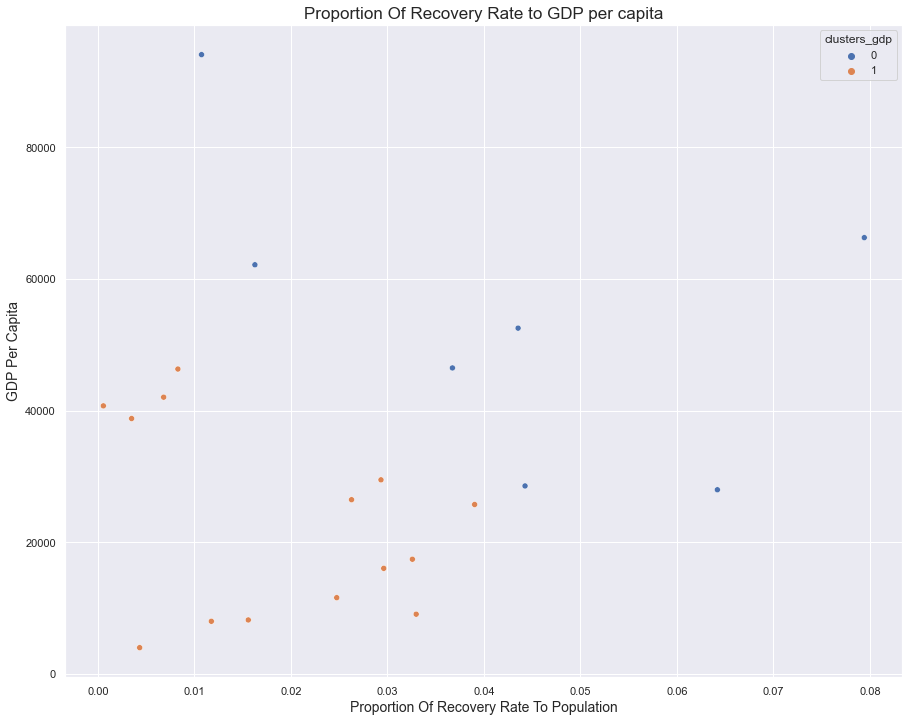

In [86]:
# visualize the 2 groups on chart

sns.scatterplot(data=final_shortlist, x='pct_rec', y='gdp_per_capita', hue='clusters_gdp');
plt.title('Proportion Of Recovery Rate to GDP per capita', fontsize=17);
plt.xlabel('Proportion Of Recovery Rate To Population', fontsize=14);
plt.ylabel('GDP Per Capita', fontsize=14);

In [87]:
# shortlist the higher GDP for group 0

gdp_shortlist_a = final_shortlist[final_shortlist['clusters_gdp']==1]
gdp_shortlist_b = final_shortlist[final_shortlist['clusters_gdp']==0]

## Final list of countries (preferred)

In [103]:
# review

gdp_shortlist_b.country

30          Canada
61         Germany
64          Greece
123         Norway
160    Switzerland
167         Turkey
147      Singapore
Name: country, dtype: object

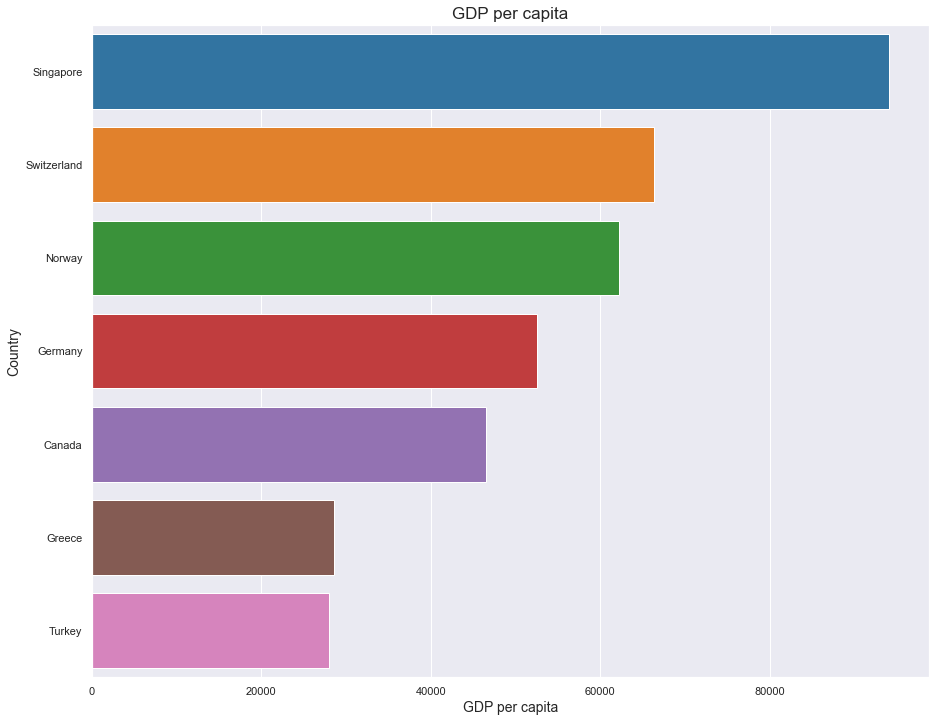

In [95]:
# review final list of countries

order = gdp_shortlist_b.sort_values('gdp_per_capita', ascending=False).country
sns.barplot(data=gdp_shortlist_b, x='gdp_per_capita', y='country', order=order, palette='tab10')
plt.title('GDP per capita', fontsize=17);
plt.xlabel('GDP per capita', fontsize=14);
plt.ylabel('Country', fontsize=14);

plt.show()

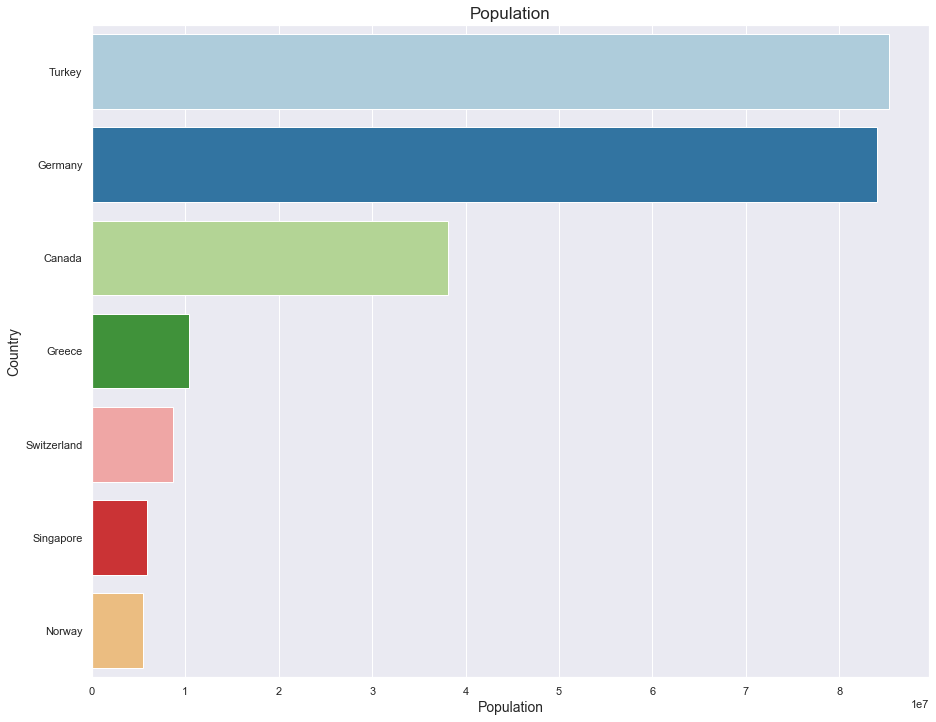

In [100]:
# review final list of countries

order = gdp_shortlist_b.sort_values('population', ascending=False).country
sns.barplot(data=gdp_shortlist_b, x='population', y='country', order=order, palette ='Paired')
plt.title('Population', fontsize=17);
plt.xlabel('Population', fontsize=14);
plt.ylabel('Country', fontsize=14);

plt.show()

## 2nd group for consideration

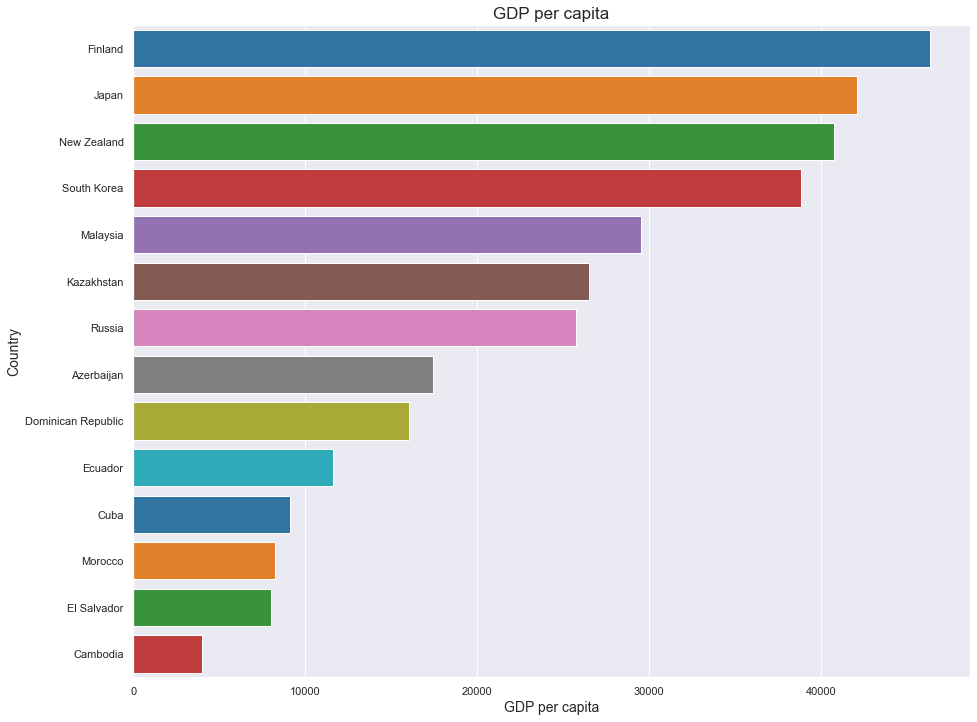

In [101]:
# review final list of countries

order = gdp_shortlist_a.sort_values('gdp_per_capita', ascending=False).country
sns.barplot(data=gdp_shortlist_a, x='gdp_per_capita', y='country', order=order, palette='tab10')
plt.title('GDP per capita', fontsize=17);
plt.xlabel('GDP per capita', fontsize=14);
plt.ylabel('Country', fontsize=14);

plt.show()

# THANK YOU!!!